In [3]:
#import some packages
import pandas as pd
import numpy as np
import scipy

#plot package
import matplotlib.pyplot as mp
%matplotlib inline

In [6]:
#Read Data
#read file into Python
file_location = "E:/My Learning/Bittiger BA/Homework/HW4/" 
file_name = "orders_new.csv"
orders_new = pd.read_csv(file_location + file_name)
orders_new.date = pd.to_datetime(orders_new.date, format = '%Y-%m-%d')

In [ ]:
#Class1-Q1
#remove duplicates in a dataset
Table_new = pd.DataFrame(Table, columns = ["country","date","experiment_id","order_id","spend_usd","user_id","vertical"])
Table_new.drop_duplicates()

In [ ]:
#Class1-Q2
#in SQL
SELECT SUM(
    CASE WHEN acceptor_id IS NULL THEN 0
    ELSE 1 END)/COUNT(*) AS acceptance_rate
FROM friend_request as fr
LEFT JOIN request_accepted as ra
ON fr.requester_id = ra.requestor_id AND fr.sent_to_id = ra.acceptor_id

#in Python
acceptance_table = pd.DataFrame(pd.merge(friend_request, request_accpeted, how = 'left', left_on = ['requester_id','sent_to_id'], right_on = ['requestor_id','acceptor_id']))
acceptance_count = acceptance.count(axis = 1, numeric_only=False)
acceptance_rate = acceptance_count['requester_id']/acceptance_count['accpetor_id']

In [ ]:
#Class1-Q3
#Amazon.com is focusing on online retail which provides not only variety of products to end customers 
#but also a platform for other retailers to sell their products and taking a cut for every purchase.
#As a world leading e-commerce company, Amazon has advanced supply chain network and has access to a great amount of resources.
#So Amazon.com gains most of its revenue from B2C.
#I am a master student in supply chain management. I have passion on solving problems and making improvement in supply chain.
#Based on my background in logistics and transportation department, I am willing to contribute to a fast-growing network
#with huge potentials.
#If I were CEO, I would focus more on improve the effecience of current last-mile transportation network, which would expand
#current market of same-day delivery.

date
2017-04-01    2.748203
2017-04-02   -2.076712
2017-04-03    0.935059
2017-04-04   -1.995413
2017-04-05   -2.887326
2017-04-06   -3.223072
2017-04-07   -3.457210
Name: spend_usd, dtype: float64
the cumulative % uplift on revenue is  -2.16431093306 %


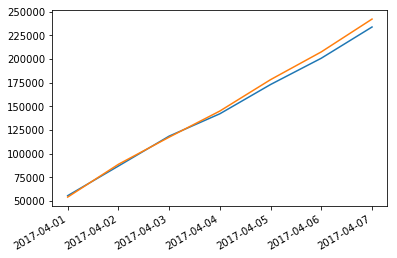

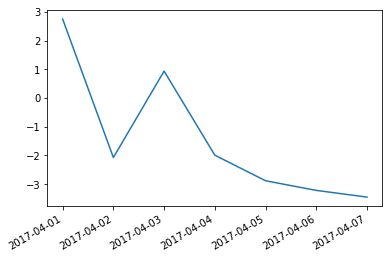

In [7]:
#Class2-Q1
#PrintCumulativeTimeSeries()
#function to calculate cumulative spend
def GetCum(my_data, exp_id):
    Table1 = my_data[['date','spend_usd']][my_data.experiment_id == exp_id]
    Table2 = Table1.groupby('date')['spend_usd'].sum()
    Table3 = np.cumsum(Table2)
    return(Table3) 

#function to plot
def GetPlot(time_series, exp_series, ctrl_series):
    df = pd.DataFrame(
    {
        "exp": exp_series.tolist(),
        "ctrl": ctrl_series.tolist()
    },
    index = time_series,
    columns = ['exp','ctrl']
    )
    fig, df_plot = mp.subplots()
    df_plot.plot(df)
    mp.gcf().autofmt_xdate()

#def PrintCumulativeTimeSeries(exp_id,country,vertical)
#combine functions
def PlotDailyTimeSeries(my_data,exp_list,country,vertical):
    time_series = np.sort(np.unique(my_data.date))
    exp_series = GetCum(my_data,exp_list[0])
    ctrl_series = GetCum(my_data,exp_list[1])
    #A time series chart showing the cumulative uplift 
   
    GetPlot(time_series, exp_series, ctrl_series)   
    #Print out the cumulative % uplift on revenue
    compare = (exp_series - ctrl_series)/ctrl_series * 100
    fig, compare_plot = mp.subplots()
    compare_plot.plot(compare)
    mp.gcf().autofmt_xdate()
    print(compare)
    print('the cumulative % uplift on revenue is ', (sum(exp_series)-sum(ctrl_series))*100/(sum(ctrl_series)), '%')
    
#Test
PlotDailyTimeSeries(orders_new,[12624548,12624549],['US','JP'],'ANDROID_APPS')

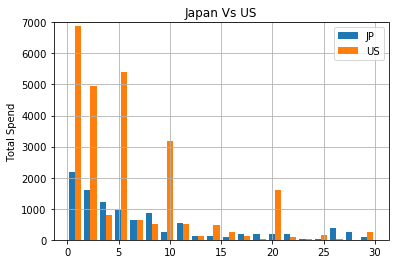

In [8]:
#Class2-Q2
#histogram chart for US and JP
#subtable
jp_data = orders_new['spend_usd'][(orders_new.country == 'JP') & (orders_new.spend_usd <30)]
us_data = orders_new['spend_usd'][(orders_new.country == 'US') & (orders_new.spend_usd <30)]

#plot
fig, vs_plot = mp.subplots()
vs_plot.hist((jp_data, us_data), label = ('JP','US'), bins = 20)

#label and title
vs_plot.set_title('Japan Vs US')
vs_plot.set_ylim(0,7000)
vs_plot.set_ylabel('Total Spend')
vs_plot.grid(True, which = 'both')
vs_plot.legend().get_texts()[0].set_text('JP')
vs_plot.legend().get_texts()[1].set_text('US')

In [ ]:
#Class2-Q3
#Write functions to handle the scenario where there are 10 experiments in our data
def GetData(my_data, exp_id):
    Table1 = my_data[['date','spend_usd']][my_data.experiment_id == exp_id]
    Table2 = Table1.groupby('date')['spend_usd'].sum()
    return(Table2)

#function to plot
def GetPlot(exp_table, i):
    fig, getplot = mp.subplpts()
    getplot.plot(exp_table, color = i)

#combine functions
def PlotDailyTimeSeries(my_data,exp_list):
    time_series = pd.to_datetime(np.sort(np.unique(my_data.date)), format = '%Y-%m-%d')
    for i in range(len(exp_list)):
        exp_table = GetData(my_data, exp_list[i])
        GetPlot(exp_table, i)
        mp.gcf().autofmt_xdate()
